## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving USA_cars_datasets.csv to USA_cars_datasets.csv


In [11]:
#Q1: Load the ./data/USA_cars_datasets.csv.
#Keep the following variables and drop the rest: price, year, mileage.
#Are there any NA's to handle? Look at the head and dimensions of the data.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv('USA_cars_datasets.csv')

#only keep price, year, mileage
df = df[['price', 'year', 'mileage']]

#check for NA values
print("Checking for NA values:")
print(df.isnull().sum())

#look at the head and dimensions of the data
print("\nHead of the data:")
display(df.head())

print("Dimensions: ")
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Checking for NA values:
price      0
year       0
mileage    0
dtype: int64

Head of the data:


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


Dimensions: 
Rows:  2499
Columns:  3


In [4]:
#Q2: maxmin normalize 'year' and 'mileage'
df['year'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())
df['mileage'] = (df['mileage'] - df['mileage'].min()) / (df['mileage'].max() - df['mileage'].min())

print("\nDataFrame after Maxmin normalization:")
display(df.head())


DataFrame after Maxmin normalization:


,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df[['year', 'mileage']] # Features
y = df['price'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Using a random state for reproducibility

print("Training set shape (features):", X_train.shape)
print("Testing set shape (features):", X_test.shape)
print("Training set shape (target):", y_train.shape)
print("Testing set shape (target):", y_test.shape)

Training set shape (features): (1999, 2)
Testing set shape (features): (500, 2)
Training set shape (target): (1999,)
Testing set shape (target): (500,)



The optimal k value based on the lowest MSE is: 50
MSE for the optimal k: 110202549.3014296


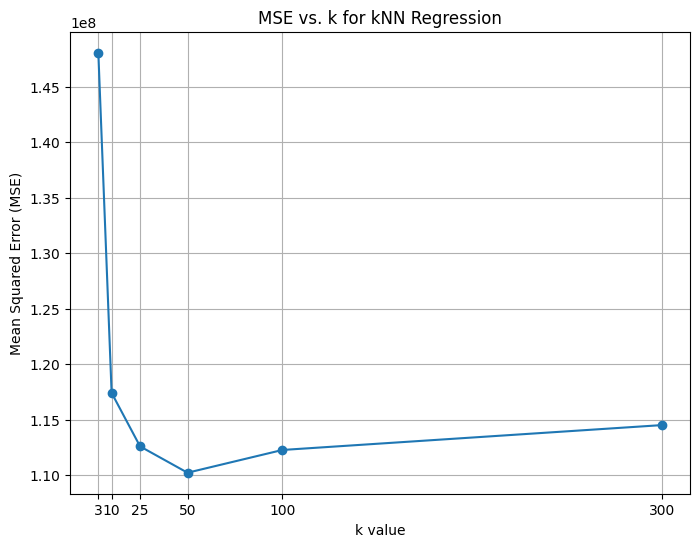

In [9]:
# Determine the optimal k
optimal_k = min(mse_scores, key=mse_scores.get)

print(f"\nThe optimal k value based on the lowest MSE is: {optimal_k}")
print("MSE for the optimal k:", mse_scores[optimal_k])

# Optional: Plot MSE vs k to visualize the optimal k
plt.figure(figsize=(8, 6))
plt.plot(k_values, list(mse_scores.values()), marker='o')
plt.xlabel("k value")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. k for kNN Regression")
plt.grid(True)
plt.xticks(k_values)
plt.show()

Mean Squared Error for k = 3: 148065935.52


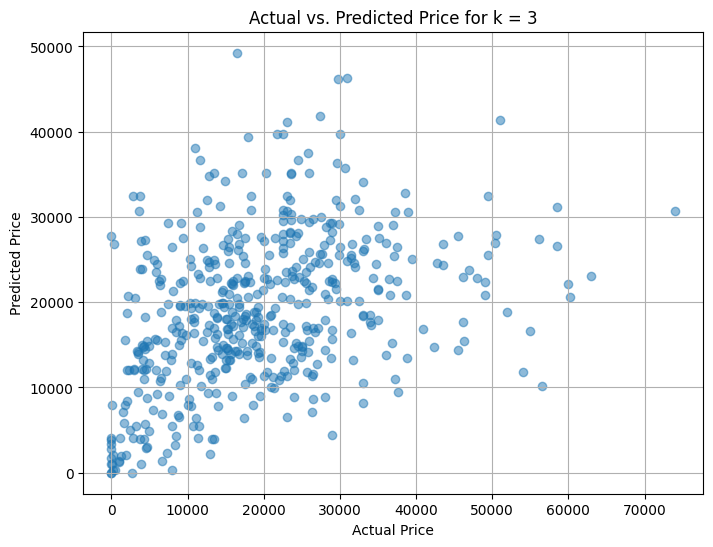

Mean Squared Error for k = 10: 117399126.11


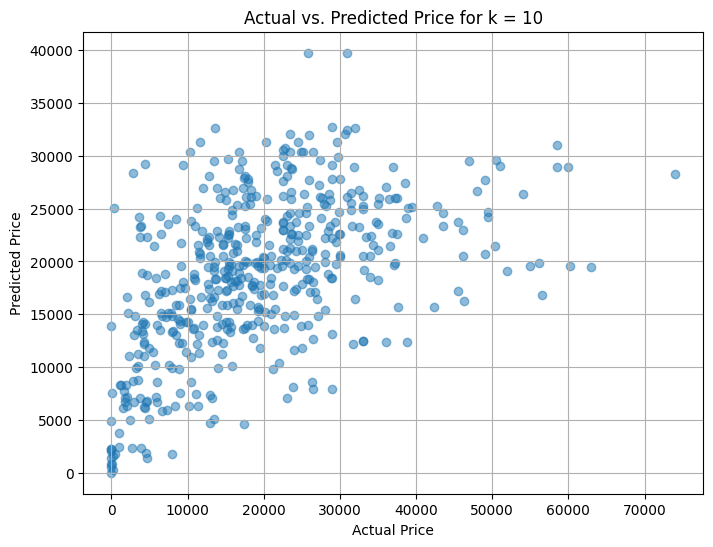

Mean Squared Error for k = 25: 112576160.82


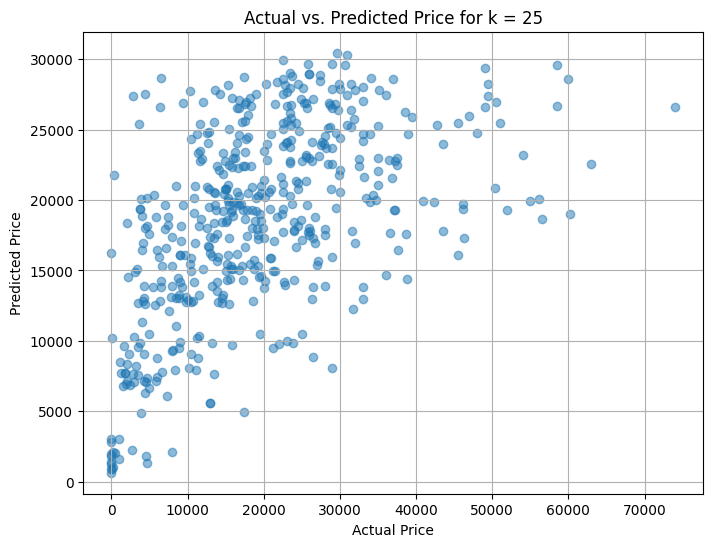

Mean Squared Error for k = 50: 110202549.30


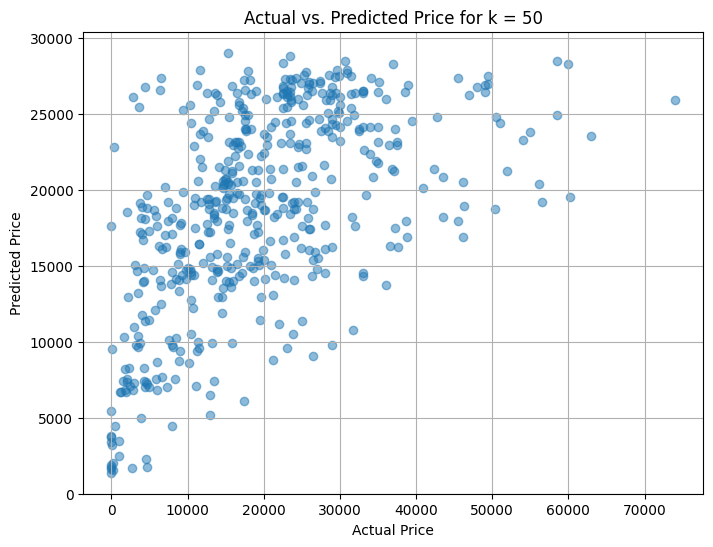

Mean Squared Error for k = 100: 112253932.82


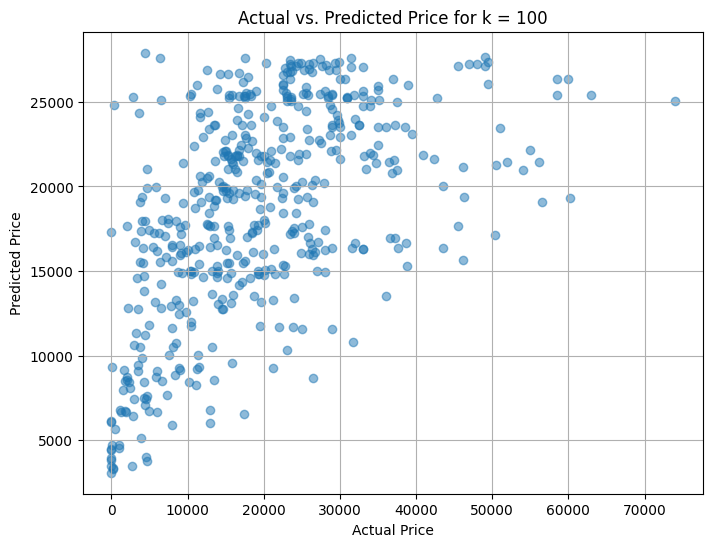

Mean Squared Error for k = 300: 114496301.83


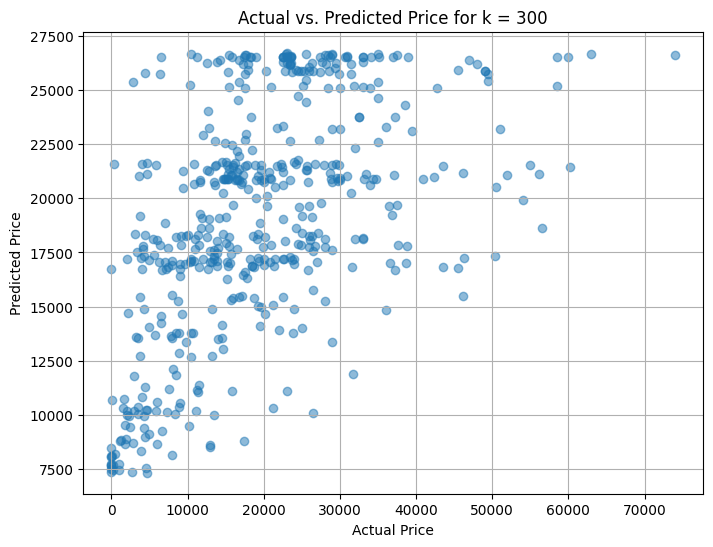

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the values of k to test
k_values = [3, 10, 25, 50, 100, 300]

# Dictionary to store MSE for each k
mse_scores = {}

for k in k_values:
    # Initialize and train the kNN regressor model
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn_model.predict(X_test)

    # Compute Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[k] = mse

    # Print MSE
    print(f"Mean Squared Error for k = {k}: {mse:.2f}")

    # Create scatterplot of test vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Actual vs. Predicted Price for k = {k}")
    plt.grid(True)
    plt.show()

**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.